In [1]:
import scanpy as sc
# only using primary somatosensory cortex (SSp)
adata = sc.read_h5ad(
    '../data/mouse_brain_adult.h5ad'
)
adult = adata[adata.obs.region_label == 'SSp', :].copy()
del adata

In [27]:
import pandas as pd
metadata = pd.read_csv(
    '../data/metaData_scDevSC.txt',
    sep = '\t',
    skiprows = [1]
)
metadata.index = metadata.NAME.to_list()
metadata.drop(
    columns = ['NAME'],
    inplace = True
)
metadata

,orig_ident,nCount_RNA,nFeature_RNA,percent_mito,n_hkgene,S_Score,G2M_Score,Phase,CC_Difference,seurat_clusters,...,donor_id,species,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,sex,species__ontology_label
E10_v1_AAACCTGAGGGTCTCC-1,E10,1544,1022,0.020078,51,0.356987,0.330795,S,0.026192,34,...,mouse_E10,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E10_v1_AAACCTGCACAACGCC-1,E10,1157,783,0.014693,39,0.453854,0.260560,S,0.193294,34,...,mouse_E10,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E10_v1_AAACCTGCACGACGAA-1,E10,2081,1200,0.016338,67,0.447598,0.218746,S,0.228852,34,...,mouse_E10,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E10_v1_AAACCTGCAGACAAGC-1,E10,2490,1430,0.021285,71,0.227723,0.307102,G2M,-0.079379,37,...,mouse_E10,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E10_v1_AAACCTGCAGAGCCAA-1,E10,2514,1416,0.021082,70,0.738406,0.136556,S,0.601850,37,...,mouse_E10,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P4_TTTGTCAGTTGATTGC-1,P4,8028,3130,0.064275,74,-0.225020,-0.244369,G1,0.019349,16,...,mouse_P4,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
P4_TTTGTCATCAACGGCC-1,P4,15768,4425,0.041540,79,-0.219746,-0.236435,G1,0.016689,24,...,mouse_P4,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
P4_TTTGTCATCCGTTGTC-1,P4,21692,4931,0.041398,76,-0.207196,-0.244800,G1,0.037604,16,...,mouse_P4,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
P4_TTTGTCATCGATGAGG-1,P4,3680,1897,0.057880,67,-0.185044,-0.185335,G1,0.000291,16,...,mouse_P4,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus


In [28]:
e10 = sc.read_10x_h5('../data/mouse_brain_E10_5.h5')
e10.var_names_make_unique()
e10.obs.index = ['E10_v1_' + i for i in e10.obs.index]
e10_metadata = metadata[metadata.index.str.startswith('E10')]
e10.obs = e10.obs.merge(
    e10_metadata,
    left_index = True,
    right_index = True,
    how = 'left'
)
e10 = e10[~e10.obs.isna().all(axis = 1), :].copy()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [29]:
data = {
    'adult': adult
}
for label, file in zip(
    ['E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'P4'],
    [
        'mouse_brain_E10_5.h5',
        'mouse_brain_E11_5.h5',
        'mouse_brain_E12_5.h5',
        'mouse_brain_E13_5.h5',
        'mouse_brain_E14_5.h5',
        'mouse_brain_E15_5.h5',
        'mouse_brain_E16_5.h5',
        'mouse_brain_E17_5.h5',
        'mouse_brain_P4.h5'
    ]
):
    adata = sc.read_10x_h5(f'../data/{file}')
    adata.var_names_make_unique()
    adata_metadata = metadata[metadata.index.str.startswith(label)]
    index_sample = adata_metadata.index[0]
    index_prefix = '_'.join(index_sample.split('_')[:-1])
    if not index_sample.endswith('-1'):
        adata.obs.index = [index_prefix + '_' + i[:-2] for i in adata.obs.index]
    
    else:
        adata.obs.index = [index_prefix + '_' + i for i in adata.obs.index]
        
    adata.obs = adata.obs.merge(
        adata_metadata,
        left_index = True,
        right_index = True,
        how = 'left'
    )
    data[label] = adata[~adata.obs.isna().all(axis = 1), :].copy()
data

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


{'adult': AnnData object with n_obs × n_vars = 81050 × 31053
     obs: 'cl', 'donor_label', 'sex_label', 'region_label', 'gene.counts', 'library_label', 'platform_label', 'joint_region_color', 'joint_region_id', 'joint_region_label', 'region_id', 'region_color', 'sex_color', 'sex_id', 'platform_color', 'platform_id', 'tasic18_cluster_id', 'tasic18_cluster_label', 'tasic18_cluster_color', 'tasic18_subclass_id', 'tasic18_subclass_label', 'tasic18_subclass_color', 'tasic18_class_id', 'tasic18_class_label', 'tasic18_class_color', 'Miniatlas_cluster_id', 'Miniatlas_cluster_label', 'Miniatlas_cluster_color', 'genes_label', 'genes_norm', 'genes_color', 'cluster_id', 'cluster_label', 'ref.cluster_label', 'old.cluster_label', 'label', 'cluster_color', 'supertype_id', 'supertype_label', 'supertype_color', 'subclass_id', 'subclass_label', 'subclass_color', 'neighborhood_id', 'neighborhood_label', 'neighborhood_color', 'class_id', 'class_label', 'class_color', 'ss_cluster_id', 'ss_cluster_color', 

In [30]:
metadata[metadata.index.str.startswith('E18')]

,orig_ident,nCount_RNA,nFeature_RNA,percent_mito,n_hkgene,S_Score,G2M_Score,Phase,CC_Difference,seurat_clusters,...,donor_id,species,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,sex,species__ontology_label
E18_5_S1_AAACCTGAGAGAGCTC,E18_S1,2142,1146,0.055556,67,-0.083741,-0.033232,G1,-0.050510,14,...,mouse_E18_S1,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_5_S1_AAACCTGAGATGTTAG,E18_S1,3192,1435,0.046679,71,-0.061365,-0.089794,G1,0.028429,1,...,mouse_E18_S1,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_5_S1_AAACCTGAGTACGTAA,E18_S1,5308,2040,0.042766,73,-0.146747,-0.126563,G1,-0.020184,4,...,mouse_E18_S1,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_5_S1_AAACCTGAGTGAACAT,E18_S1,2710,1262,0.057196,70,-0.097507,-0.071892,G1,-0.025615,1,...,mouse_E18_S1,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_5_S1_AAACCTGCAACCGCCA,E18_S1,4289,1745,0.048962,72,-0.148113,-0.162288,G1,0.014175,1,...,mouse_E18_S1,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E18_S3_TTTGTCAGTTTGACAC,E18_S3,2802,1460,0.032834,69,-0.147341,-0.144956,G1,-0.002386,0,...,mouse_E18_S3,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_S3_TTTGTCATCACCTTAT,E18_S3,4980,2137,0.028514,77,-0.034504,-0.136956,G1,0.102452,7,...,mouse_E18_S3,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_S3_TTTGTCATCATAACCG,E18_S3,3538,1754,0.023742,72,-0.195421,-0.079418,G1,-0.116003,7,...,mouse_E18_S3,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_S3_TTTGTCATCCAGGGCT,E18_S3,1610,984,0.010559,60,-0.027222,-0.063585,G1,0.036362,24,...,mouse_E18_S3,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus


In [31]:
import anndata as ad
adata1 = sc.read_10x_h5('../data/mouse_brain_E18_5_rep1.h5')
adata1.var_names_make_unique()
adata1.obs.index = ['E18_5_S1_' + i[:-2] for i in adata1.obs.index]
adata1_metadata = metadata[metadata.index.str.startswith('E18_5_S1')]
adata1.obs = adata1.obs.merge(
    adata1_metadata,
    left_index = True,
    right_index = True,
    how = 'left'
)
adata1 = adata1[~adata1.obs.isna().all(axis = 1), :].copy()

adata2 = sc.read_10x_h5('../data/mouse_brain_E18_5_rep2.h5')
adata2.var_names_make_unique()
adata2.obs.index = ['E18_S3_' + i[:-2] for i in adata2.obs.index]
adata2_metadata = metadata[metadata.index.str.startswith('E18_S3')]
adata2.obs = adata2.obs.merge(
    adata2_metadata,
    left_index = True,
    right_index = True,
    how = 'left'
)
adata2 = adata2[~adata2.obs.isna().all(axis = 1), :].copy()
adata = ad.concat([adata1, adata2])
adata.obs.loc[:, 'orig_ident'] = 'E18'
data['E18'] = adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [32]:
import anndata as ad
adata1 = sc.read_10x_h5('../data/mouse_brain_P1_rep1.h5')
adata1.var_names_make_unique()
adata1.obs.index = ['P1_S1_' + i[:-2] for i in adata1.obs.index]
adata1_metadata = metadata[metadata.index.str.startswith('P1_S1')]
adata1.obs = adata1.obs.merge(
    adata1_metadata,
    left_index = True,
    right_index = True,
    how = 'left'
)
adata1 = adata1[~adata1.obs.isna().all(axis = 1), :].copy()

adata2 = sc.read_10x_h5('../data/mouse_brain_P1_rep2.h5')
adata2.var_names_make_unique()
adata2.obs.index = ['P1_S2_' + i[:-2] for i in adata2.obs.index]
adata2_metadata = metadata[metadata.index.str.startswith('P1_S2')]
adata2.obs = adata2.obs.merge(
    adata2_metadata,
    left_index = True,
    right_index = True,
    how = 'left'
)
adata2 = adata2[~adata2.obs.isna().all(axis = 1), :].copy()
adata = ad.concat([adata1, adata2])
adata.obs.loc[:, 'orig_ident'] = 'P1'
data['P1'] = adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [33]:
cell_grouping = pd.read_excel(
    '../meta/scRNASeq_datasets_wt_groups.xlsx', 
    sheet_name = None
)
cell_grouping

{'Allen_Brain_Atlas_IN':       class_label subclass_label  subclass_id
 0       GABAergic           Sncg            4
 1       GABAergic          Lamp5            3
 2       GABAergic          Lamp5            3
 3       GABAergic          Lamp5            3
 4       GABAergic          Lamp5            3
 ..            ...            ...          ...
 370  Non-Neuronal          Oligo           37
 371  Non-Neuronal          Oligo           37
 372  Non-Neuronal          Astro           38
 373  Non-Neuronal          Astro           38
 374  Non-Neuronal          Astro           38
 
 [375 rows x 3 columns],
 'Allen_Brain_Atlas_OUT':       class_label subclass_label  subclass_id
 0   Glutamatergic             CR            1
 1       GABAergic          Meis2            2
 2       GABAergic          Meis2            2
 3    Non-Neuronal           Endo           39
 4    Non-Neuronal       SMC-Peri           40
 5    Non-Neuronal       SMC-Peri           40
 6    Non-Neuronal       SMC-Pe

In [34]:
# remove bad cells
rem_cellids = cell_grouping['Di_Bella_OUT'].subclass_label.str.strip().str.lower().to_list() + ['low quality cells', 'doublet', 'cajal retzius cells']
for key, adata in data.items():
    if key == 'adult':
        continue
    
    else:
        data[key] = adata[~adata.obs.New_cellType.str.lower().isin(rem_cellids)].copy()

In [35]:
# annotate class labels
group_assignment = {
    row['subclass_label'].strip().lower(): row['class_label'].strip() for i, row in cell_grouping['Di_Bella_IN'].iterrows()
}
group_assignment['astrocytes'] = 'Non-Neuronal'
group_assignment['dl_cpn_1'] = 'Mature Glutamatergic'
group_assignment['dl_cpn_2'] = 'Mature Glutamatergic'
group_assignment['dl cpn'] = 'Mature Glutamatergic'
group_assignment['oligodendrocytes'] = 'Non-Neuronal'
group_assignment['layer 4'] = 'Mature Glutamatergic'
group_assignment['ul cpn'] = 'Mature Glutamatergic'
group_assignment['cycling glial cells'] = 'Non-Neuronal'
group_assignment['layer 6b'] = 'Mature Glutamatergic'

for key, adata in data.items():
    if key == 'adult':
        continue
    
    else:
        adata.obs['class_label'] = adata.obs.New_cellType.str.lower().apply(
            lambda x: group_assignment[x]
        )

In [36]:
# remove cells; adult does not need to be relabelled since it already contains this labelling so only removal is done here
rem_cellids = cell_grouping['Allen_Brain_Atlas_OUT'].subclass_label.str.strip().str.lower().unique()
data['adult'] = data['adult'][~data['adult'].obs.subclass_label.str.lower().isin(rem_cellids), :].copy()

In [37]:
data['adult'].obs.loc[:, 'class_label'] = data['adult'].obs.class_label.apply(
    lambda x: 'Mature ' + x if x == 'Glutamatergic' else x
)

In [46]:
keep_adult = ['class_label', 'subclass_label', 'donor_label']
data['adult'].obs = data['adult'].obs.loc[:, keep_adult]
data['adult'].obs.loc[:, 'donor_label'] = data['adult'].obs['donor_label'].astype(str)
data['adult'].obs.rename(
    columns = {
        'donor_label': 'donor_id'
    },
    inplace = True
)

In [43]:
for key, adata in data.items():
    if key == 'adult':
        continue
    
    else:
        adata.obs = adata.obs.loc[:, ['class_label', 'New_cellType', 'donor_id']]
        adata.obs.rename(
            columns = {
                'New_cellType': 'subclass_label'
            },
            inplace = True
        )

In [47]:
for key, adata in data.items():
    adata.obs['developmental_stage'] = key

adata = ad.concat(data.values())

In [ ]:
adata.write(
    '../data/mouse_brain_dev_E10_to_adult.h5ad'
)

In [2]:
import scanpy as sc
adata = sc.read_h5ad(
    '../data/mouse_brain_dev_E10_to_adult.h5ad'
)

In [3]:
adata = adata[
    adata.obs.class_label.isin(['Progenitors', 'Immature Glutamatergic', 'Mature Glutamatergic']) & 
    ~adata.obs.developmental_stage.isin(['E10', 'adult']), 
    :
].copy()
adata

AnnData object with n_obs × n_vars = 63358 × 26589
    obs: 'class_label', 'subclass_label', 'donor_id', 'developmental_stage'

In [3]:
import scanpy as sc
import scvi
import glob
import os
from functools import reduce
import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.io import mmread
import gzip

def read_sc_data(
    counts_file, 
    features_file,
    metadata_file
):
    data_dict = {}
    for key, filename in zip(
        ['counts', 'features', 'metadata'],
        [counts_file, features_file, metadata_file]
    ):
        if filename.endswith('gz'):
            open_file = lambda x: gzip.open(x, 'rt')
            
        else: 
            open_file = lambda x: open(x, 'r')
            
        with open_file(filename) as file:
            if key == 'counts':
                # transpose due to the way the data was exported to comply with Seurat
                # see also convert_to_raw.ipynb
                data = mmread(file).T.tocsr()
            
            elif key == 'metadata':
                data = pd.read_csv(
                    file,
                    sep = '\t',
                    index_col = 0
                )
            
            else:
                data = pd.DataFrame(
                    index = file.read().rstrip().split()
                )
            
        data_dict[key] = data

    adata = ad.AnnData(
        X = data_dict['counts'],
        obs = data_dict['metadata'],
        var = data_dict['features']
    )
    return adata


def compute_qc_metrics(adata, mito_regex = '^MT.', ribo_regex = '^RP[SL]'):
    # flatten is needed due to csr_matrix.sum returning a numpy.matrix object
    # which cannot be broadcasted to obs frame
    adata.obs['nFeature_RNA'] = np.array((adata.X > 0).sum(axis = 1)).flatten()
    adata.obs['nCount_RNA'] = np.array(adata.X.sum(axis = 1)).flatten()
    
    for column, rx in zip(['percent_mt', 'percent_ribo'], [mito_regex, ribo_regex]):
        if adata.var.index.str.match(rx).any():
            adata.obs[column] = np.array(
                adata[:, adata.var.index.str.match(rx)].X.sum(axis = 1) / adata.X.sum(axis = 1) * 100
            ).flatten()

        else:
            print(f"Didn't find anything with regular expression {rx}. {column} not computed!")


def apply_qc_thresholds(adata, sample_id_column, sample_thresholds):
    adata.obs['qc_pass'] = True
    for sample_id, thresholds in sample_thresholds.items():
        df = adata.obs.loc[adata.obs[sample_id_column] == sample_id, :]
        feature_qcs = []
        for feature, (lo, hi) in thresholds.items():
            feature_qcs.append(
                df[feature].apply(lambda x: x > lo and x < hi).values
            )
        
        qc_pass = np.all(
            np.vstack(feature_qcs),
            axis = 0
        )
        adata.obs.loc[adata.obs[sample_id_column] == sample_id, 'qc_pass'] = qc_pass


def generate_plots(
    axs, 
    df,
    qc_pass_idx, 
    thresholds = None
):
    datacols = ['nFeature_RNA', 'percent_mt', 'percent_ribo']
    hue = ['pass' if x else 'fail' for x in qc_pass_idx] if not all(qc_pass_idx) else None
    palette = {'pass': '#4B72B1', 'fail': 'red'} if hue else None
    for j, datacol in enumerate(datacols):
        sns.histplot(
            x = df.loc[:, datacol],
            ax = axs[0, j],
            hue = hue,
            palette = palette,
            kde = True,
            fill = True
        )
        if thresholds and datacol in thresholds:
            for position in thresholds[datacol]:
                if position:
                    axs[0, j].axvline(
                        position,
                        color = 'k',
                        linewidth = 1
                    )
                
    
    xy = [
        ('nCount_RNA', 'nFeature_RNA'),
        ('nFeature_RNA', 'percent_mt'),
        ('percent_mt', 'percent_ribo')
    ]
    for j, (xcol, ycol) in enumerate(xy): 
        sns.scatterplot(
            x = df.loc[:, xcol],
            y = df.loc[:, ycol],
            ax = axs[1, j],
            hue = hue,
            palette = palette,
            edgecolor = 'k',
            facecolor = None,
            color = None,
            alpha = 0.5
        )
        sns.kdeplot(
            x = df.loc[qc_pass_idx, xcol],
            y = df.loc[qc_pass_idx, ycol],
            ax = axs[1, j],
            color = 'lightblue'
        )
        
        if thresholds:
            for key, plotline in zip(
                [xcol, ycol],
                [axs[1, j].axvline, axs[1, j].axhline]
            ):
                if key in thresholds:
                    for position in thresholds[key]:
                        if position:
                            plotline(
                                position,
                                color = 'k',
                                linewidth = 1
                            )

                            
def plot_qc(
    adata,
    thresholds = None, 
    sample_id_column = None,
    sharex = False
):
    if not sample_id_column:
        fig, axs = plt.subplots(2, 3)
        generate_plots(
            axs,
            adata.obs,
            qc_pass_idx = adata.obs[column_dict['qc_pass']] if 'qc_pass' in adata.obs.columns else [True] * adata.obs.shape[0],
            thresholds = thresholds
        )
        
    else:
        fig, axs = plt.subplots(
            adata.obs[sample_id_column].nunique(), 
            6, 
            sharex = 'col' if sharex else 'none'
        )
        for i, sample_id in enumerate(adata.obs[sample_id_column].unique()):
            tmp_df = adata[adata.obs[sample_id_column] == sample_id, :].obs
            generate_plots(
                axs[i, :].reshape(2, 3),
                tmp_df,
                qc_pass_idx = tmp_df['qc_pass'] if 'qc_pass' in tmp_df.columns else [True] * tmp_df.shape[0],
                thresholds = thresholds[sample_id] if thresholds else None
            )
            axs[i, 0].set_ylabel(sample_id)
    
    return fig


def integrate_data_scvi(
    adata, 
    batch_key, 
    categorical_covariate_keys = None,
    continuous_covariate_keys = None,
    use_highly_variable_genes = True,
    n_top_genes = 4000,
    use_gpu = True,
    max_epochs = None,
    train_size = 0.9
    
):
    adata.layers['counts'] = adata.X.copy()
    adata.raw = adata
    
    if use_highly_variable_genes:
        print('computing highly variable genes')
        sc.pp.highly_variable_genes(
            adata,
            n_top_genes = n_top_genes,
            layer = 'counts',
            subset = True,
            flavor = 'seurat_v3',
        )
        
    scvi.model.SCVI.setup_anndata(
        adata,
        layer = 'counts',
        batch_key = batch_key,
        categorical_covariate_keys = categorical_covariate_keys,
        continuous_covariate_keys = continuous_covariate_keys
    )
    # non default parameters from scVI tutorial and scIB github
    # see https://docs.scvi-tools.org/en/stable/tutorials/notebooks/harmonization.html
    # and https://github.com/theislab/scib/blob/main/scib/integration.py
    model = scvi.model.SCVI(
        adata,
        n_layers = 2,
        n_latent = 30,
        gene_likelihood = 'nb'
    )
    model.train(
        use_gpu = use_gpu,
        max_epochs = max_epochs,
        train_size = train_size
    )
    adata.obsm['X_scvi'] = model.get_latent_representation()
    
    print('compute umap from scvi embedding')
    sc.pp.neighbors(
        adata,
        use_rep = 'X_scvi'
    )
    sc.tl.umap(
        adata
    )
    
    return {'data': adata, 'model': model}

Global seed set to 0


In [22]:
compute_qc_metrics(adata, mito_regex = '^mt-')

Didn't find anything with regular expression ^RP[SL]. percent_ribo not computed!


/users/daniel.malzl/.conda/envs/nova/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/users/daniel.malzl/.conda/envs/nova/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/users/daniel.malzl/.conda/envs/nova/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/users/daniel.malzl/.conda/envs/nova/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/users/daniel.ma

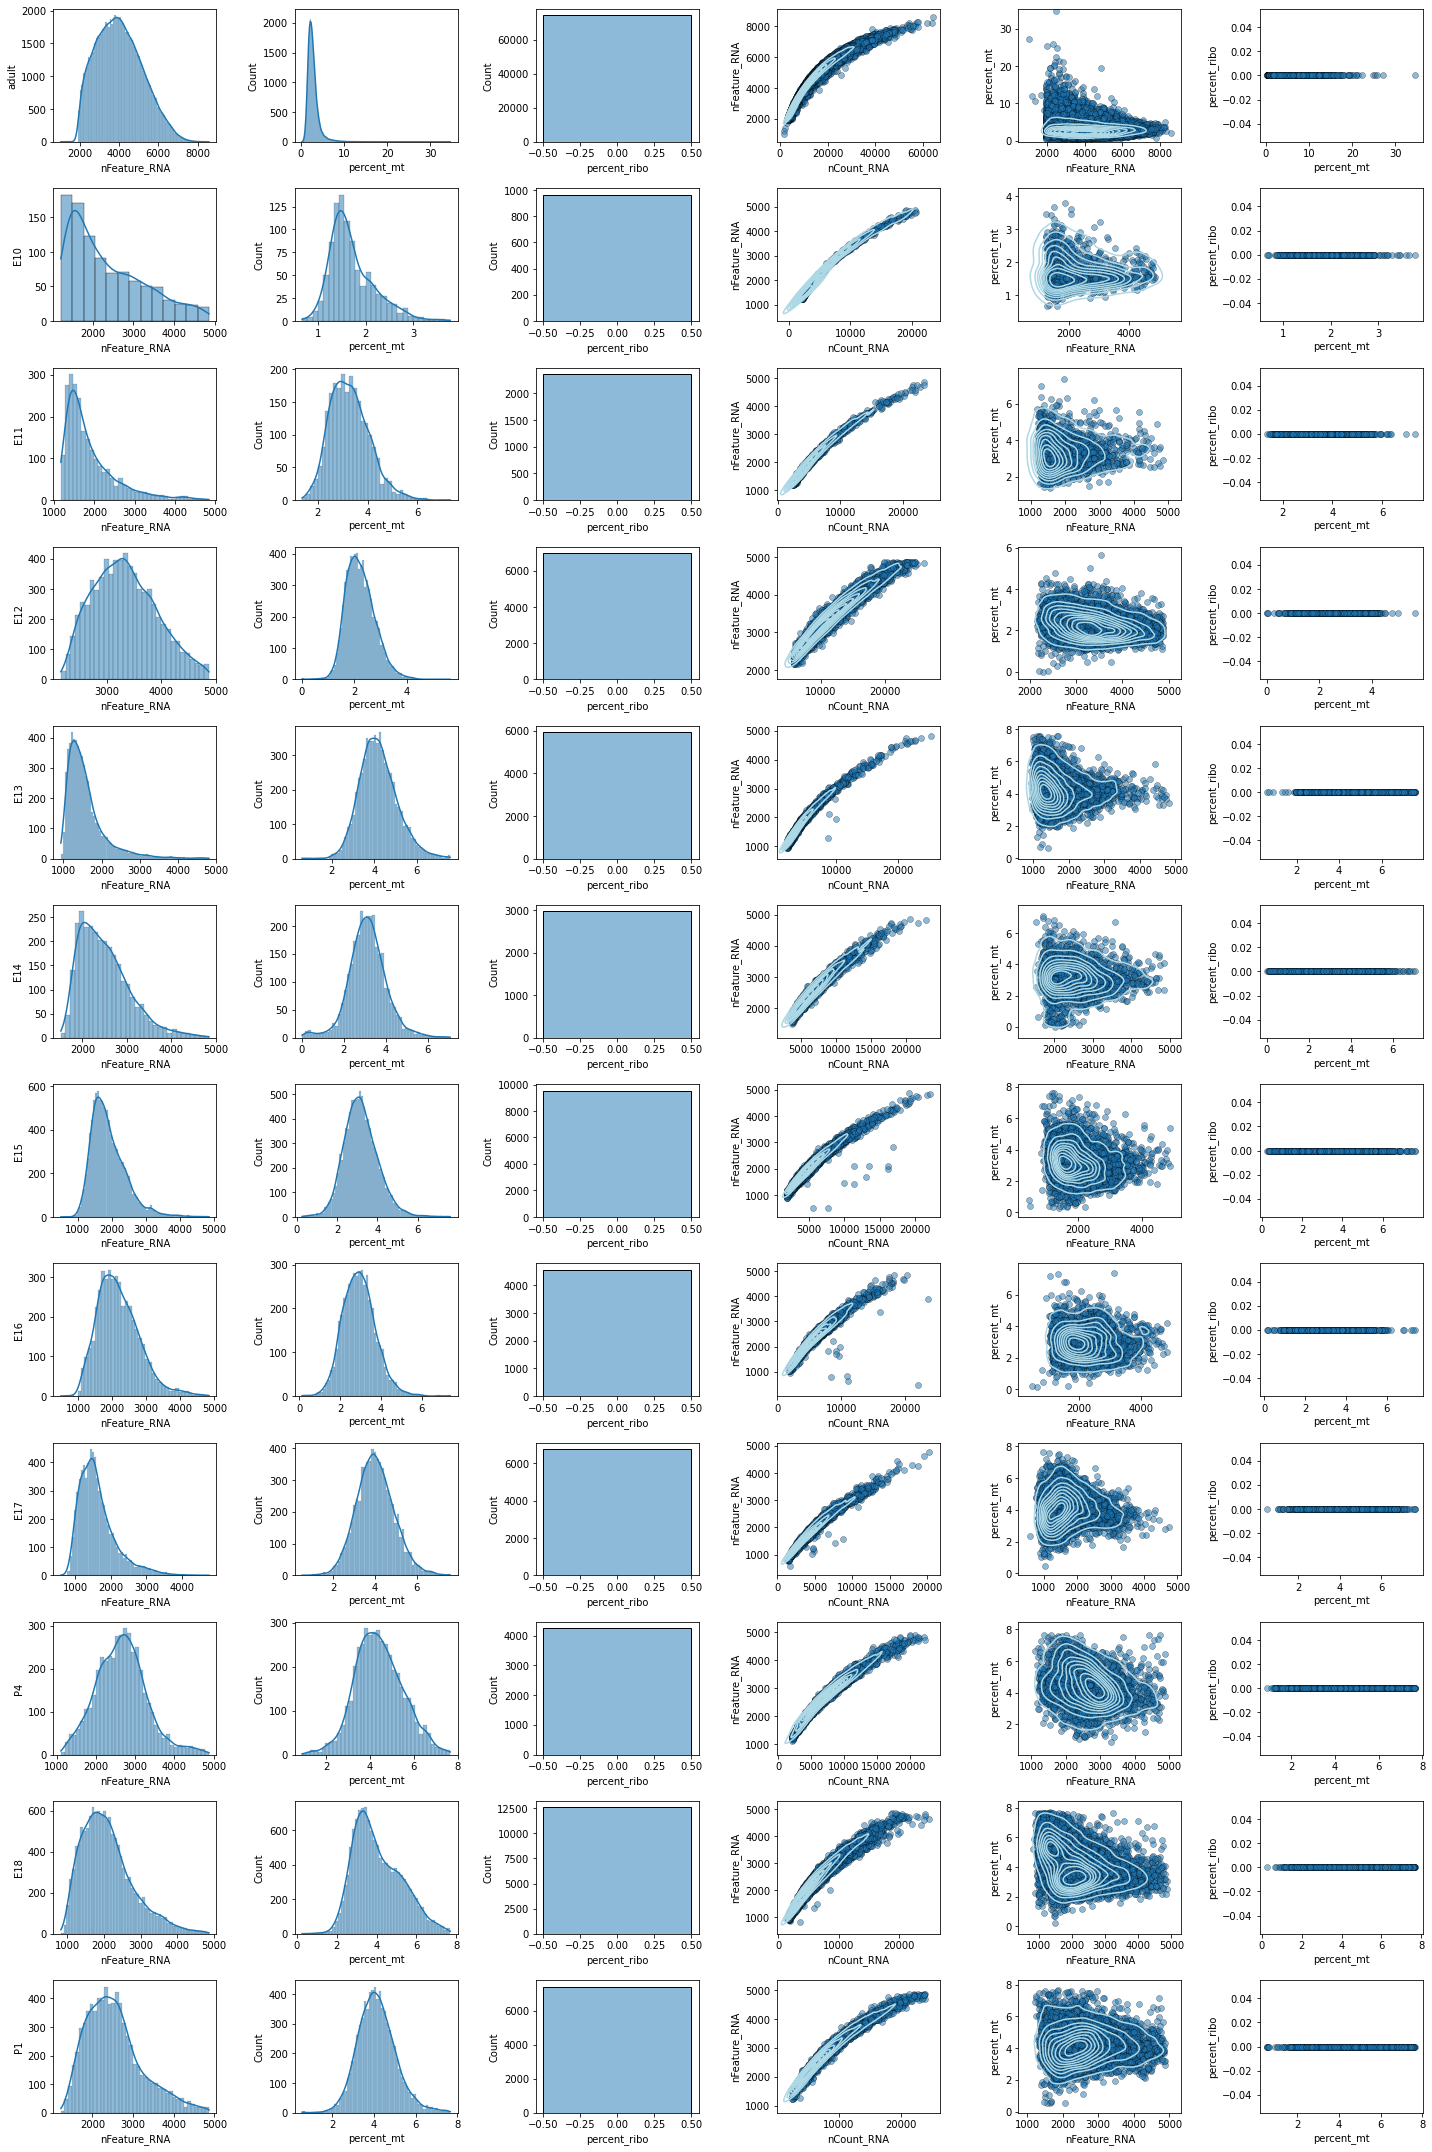

In [23]:
fig = plot_qc(
    adata,
    sample_id_column = 'developmental_stage'
)
fig.set_figwidth(20)
fig.set_figheight(adata.obs.developmental_stage.nunique() * 2.5)
fig.tight_layout()

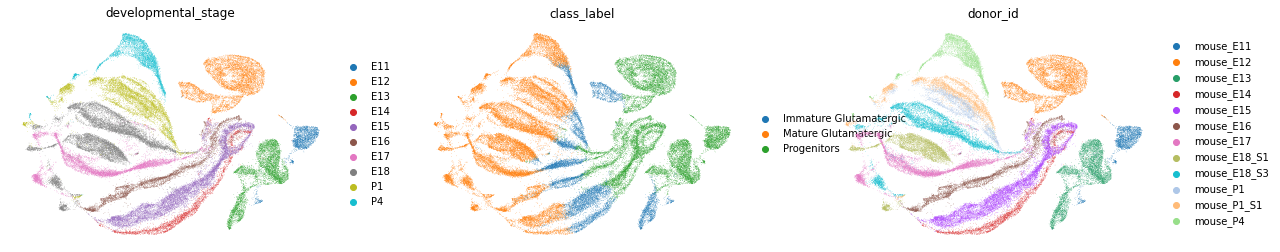

In [5]:
tmp = adata.copy()
tmp.layers['counts'] = tmp.X.copy()
sc.pp.normalize_total(
    tmp, 
    target_sum = 1e4
)
sc.pp.log1p(tmp)
sc.pp.scale(tmp)
sc.pp.highly_variable_genes(
    tmp,
    n_top_genes = 4000,
    layer = "counts",
    flavor = "seurat_v3",
)
sc.pp.pca(
    tmp, 
    n_comps = 40, 
    svd_solver = 'arpack',
    use_highly_variable = True,
)
sc.pp.neighbors(
    tmp,
    use_rep = 'X_pca'
)
sc.tl.umap(tmp)
sc.pl.umap(
    tmp,
    color = ['developmental_stage', 'class_label', 'donor_id'],
    frameon = False,
    size = 1
)

In [6]:
del tmp

In [ ]:
integration_params = {
    'full': {
        'subset': np.ones(
            shape = adata.obs.shape[0], 
            dtype = bool
        ),
        'kwargs': dict(
            categorical_covariate_keys = None
        )
    }
}

results = {}
for key, params in integration_params.items():
    print(key)
    results[key] = integrate_data_scvi(
        adata[params['subset'], :].copy(),
        'donor_id',
        train_size = 1,
        use_highly_variable_genes = False,
        **params['kwargs']
    )

    results[key]['data'].write(
        f'../data/mouse_brain_dev_E10_to_adult.{key}.integrated.h5ad'
    )

    results[key]['model'].save(
        f'../data/dev.{key}.integration.scvi.model'
    )

In [7]:
results = {'full': {}}
results['full']['data'] = sc.read_h5ad(
    f'../data/mouse_brain_dev_E10_to_adult.full.integrated.h5ad'
)

results['full']['model'] = scvi.model.SCVI.load(
    f'../data/dev.full.integration.scvi.model/',
    adata = results['full']['data']
)

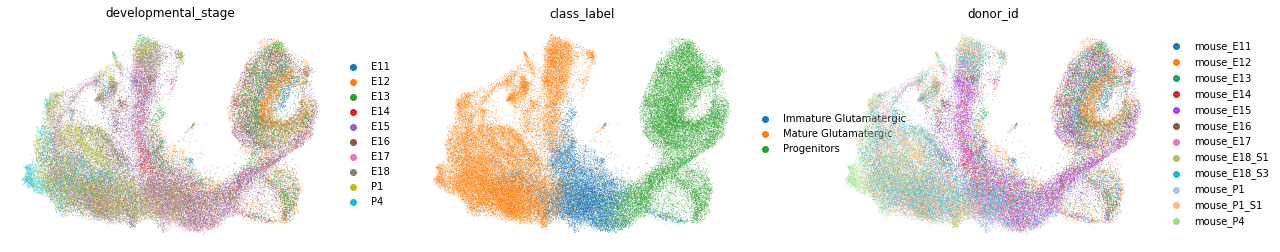

In [8]:
sc.pl.umap(
    results['full']['data'],
    color = ['developmental_stage', 'class_label', 'donor_id'],
    frameon = False
)

In [10]:
results['full']['data'].layers['scvi_normalized'] = results['full']['model'].get_normalized_expression(
    library_size = 10e4
)

In [11]:
# this is downloaded from KEGG see metabo_analysis.ipynb
import pickle
with open('../raw/kegg_pathway_maps.pickle', 'rb') as handle:
    pathwaymaps = pickle.load(handle)

In [12]:
import pandas as pd
selection_df = pd.DataFrame(
    [
        ['Glycolysis', 'mmu00010', 'M00001'],
        ['TCA cycle', 'mmu00020', 'M00009'],
        ['Fatty acid degradation', 'mmu00071', '-'],
        ['Oxidative phosphorylation', 'mmu00190', '-'],
        ['Valine, Leucine and Isoleucine degradation', 'mmu00280', '-'],
        #['Pyruvate metabolism', 'mmu00620', '-'],
        #['Linoleic acid metabolism', 'mmu00591', '-'],
        #['Arachidonic acid metabolism', 'mmu00590', '-'],
        #['Glycerophospholipid metabolism', 'mmu00564', '-'],
        ['Glycerolipid metabolism', 'mmu00561', '-']
    ],
    columns = ['pathway', 'kegg_map', 'kegg_module']
)
selection_df

selected_pathways = {k:pathwaymaps[k] for k in selection_df.kegg_map}

In [13]:
def get_pathway_genes(pathways):
    genes = []
    for name, pathway in pathways.items():
        if 'GENE' in pathway:
            for ncbid, gene in pathway['GENE'].items():
                if gene.get('genesymbol'):
                    genes.append(
                        [
                            ncbid,
                            gene['genesymbol'],
                            name
                        ]
                    )
    
    df = pd.DataFrame(
        genes, 
        columns = ['ncbi_id', 'genesymbol', 'kegg_map']
    )
    df.drop_duplicates(
        subset = ['ncbi_id'],
        inplace = True
    )
    return df

pathway_genes = get_pathway_genes(selected_pathways)
pathway_genes = pathway_genes.merge(
    selection_df.loc[:, ['pathway', 'kegg_map']],
    on = 'kegg_map',
    how = 'left'
)
pathway_genes

,ncbi_id,genesymbol,kegg_map,pathway
0,15277,Hk2,mmu00010,Glycolysis
1,212032,Hk3,mmu00010,Glycolysis
2,15275,Hk1,mmu00010,Glycolysis
3,216019,Hkdc1,mmu00010,Glycolysis
4,103988,Gck,mmu00010,Glycolysis
...,...,...,...,...
354,69923,Agk,mmu00561,Glycerolipid metabolism
355,23945,Mgll,mmu00561,Glycerolipid metabolism
356,68393,Mogat1,mmu00561,Glycerolipid metabolism
357,233549,Mogat2,mmu00561,Glycerolipid metabolism


In [14]:
adata = results['full']['data']
adata.obs.groupby(['developmental_stage', 'class_label']).count()

subclass_label  donor_id  \
developmental_stage class_label                                        
E11                 Immature Glutamatergic             111       111   
                    Mature Glutamatergic                 0         0   
                    Progenitors                       2250      2250   
E12                 Immature Glutamatergic            1084      1084   
                    Mature Glutamatergic                 0         0   
                    Progenitors                       5898      5898   
E13                 Immature Glutamatergic            1440      1440   
                    Mature Glutamatergic                 0         0   
                    Progenitors                       4483      4483   
E14                 Immature Glutamatergic            1284      1284   
                    Mature Glutamatergic               632       632   
                    Progenitors                       1058      1058   
E15                 Immature Glutamatergic            3001      3001   
                    Mature Glutamatergic              2333      2333   
                    Progenitors                       4207      4207   
E16                 Immature Glutamatergic            1119      1119   
                    Mature Glutamatergic              1514      1514   
                    Progenitors                       1924      1924   
E17                 Immature Glutamatergic            1617      1617   
                    Mature Glutamatergic              4866      4866   
                    Progenitors                        278       278   
E18                 Immature Glutamatergic             972       972   
                    Mature Glutamatergic             11124     11124   
                    Progenitors                        493       493   
P1                  Immature Glutamatergic            1089      1089   
                    Mature Glutamatergic              6214      6214   
                    Progenitors                        115       115   
P4                  Immature Glutamatergic             912       912   
                    Mature Glutamatergic              3340      3340   
                    Progenitors                          0         0   

                                            _scvi_batch  _scvi_labels  
developmental_stage class_label                                        
E11                 Immature Glutamatergic          111           111  
                    Mature Glutamatergic              0             0  
                    Progenitors                    2250          2250  
E12                 Immature Glutamatergic         1084          1084  
                    Mature Glutamatergic              0             0  
                    Progenitors                    5898          5898  
E13                 Immature Glutamatergic         1440          1440  
                    Mature Glutamatergic              0             0  
                    Progenitors                    4483          4483  
E14                 Immature Glutamatergic         1284          1284  
                    Mature Glutamatergic            632           632  
                    Progenitors                    1058          1058  
E15                 Immature Glutamatergic         3001          3001  
                    Mature Glutamatergic           2333          2333  
                    Progenitors                    4207          4207  
E16                 Immature Glutamatergic         1119          1119  
                    Mature Glutamatergic           1514          1514  
                    Progenitors                    1924          1924  
E17                 Immature Glutamatergic         1617          1617  
                    Mature Glutamatergic           4866          4866  
                    Progenitors                     278           278  
E18                 Immature Glutamatergic          972           972  
           

In [15]:
adata.X = adata.layers['scvi_normalized'].copy()
sc.pp.log1p(adata)
sc.pp.scale(adata)

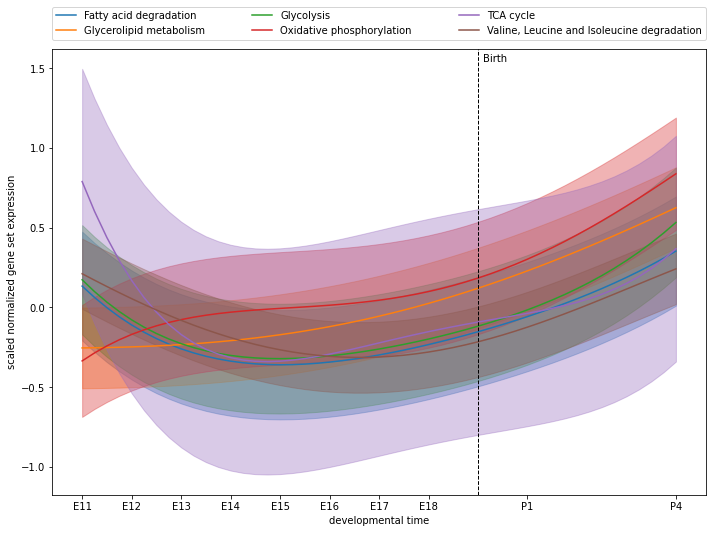

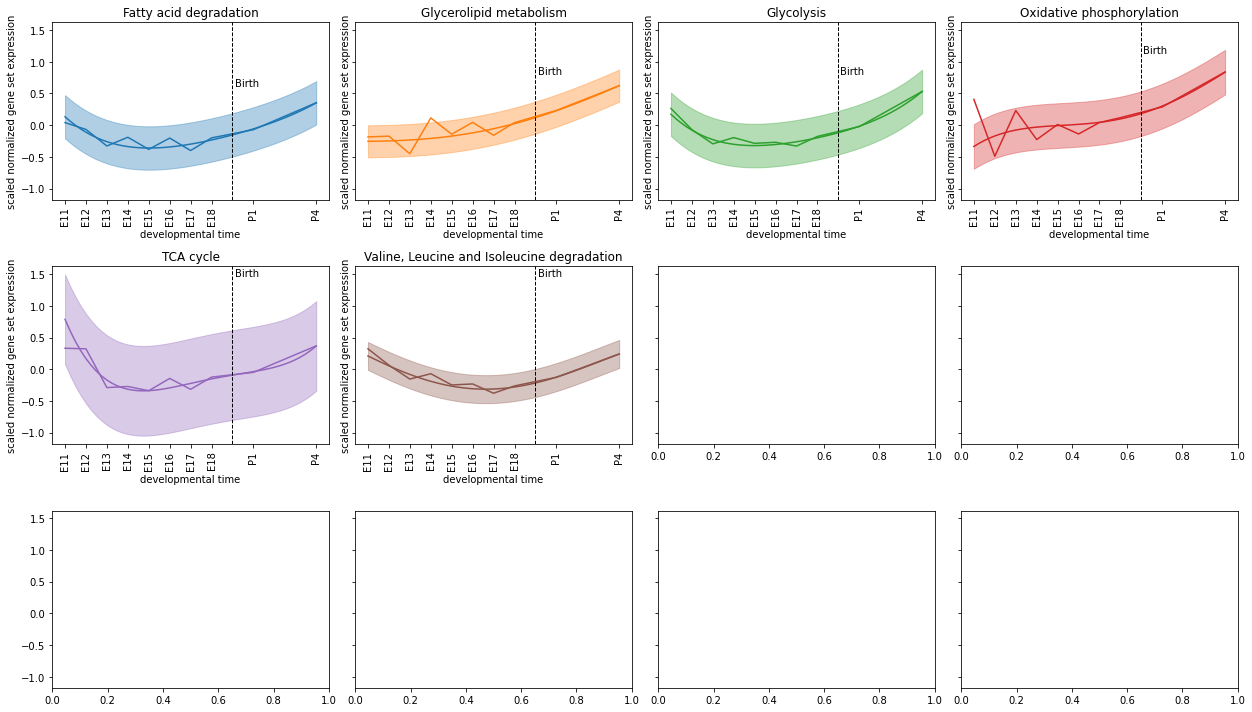

In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
mpl.rcParams['pdf.fonttype'] = 42

#colors = sns.color_palette('husl', pathway_genes.pathway.nunique())
colors = sns.color_palette('tab10')
dev_stage_list = ['E10','E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'P1', 'P4', 'adult']
pseudotime_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 25]
class_label_list = [
    'Progenitors', 
    'Immature Glutamatergic',
    'Immature Glutamatergic',
    'Immature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic'
]
subsample = False
average = 'mean'
nsamples = 100 # controls the number of cells sampled for each datapoint
multiple = 4 # controls the coarsened of the predictions
order = 4 # order of the polynomial to fit
regressor = 'bayridge' # choose the regressor type

for plotname, dev_stages, pseudotime, class_labels in zip(
    ['E11_to_P4'],
    [dev_stage_list[1:-1]],
    [pseudotime_list[1:-1]],
    [class_label_list[1:-1]]
):
    fig1, ax1 = plt.subplots()
    fig2, axs = plt.subplots(3, 4)
    axs = axs.reshape(12)
    for j, (pathway, group_df) in enumerate(pathway_genes.groupby('pathway')):
        y_arr = np.empty(shape = 0)
        x_arr = np.empty(shape = 0)
        mean_means = []
        for i, dev_stage, class_label in zip(pseudotime, dev_stages, class_labels):
            X = adata[
                    (adata.obs.developmental_stage == dev_stage) &
                    (adata.obs.class_label == class_label),
                    adata.var.index.isin(group_df.genesymbol)
                ].X.copy()
            if average == 'mean':
                means = X.mean(axis = 1)
            
            elif average == 'median':
                means = np.nanmedian(
                    X,
                    axis = 1
                )
            
            #means = (means - means.min()) / (means.max() - means.min())
            if subsample:
                means = np.random.choice(
                    means,
                    nsamples
                )

            y_arr = np.concatenate(
                [
                    y_arr,
                    means
                ]
            )
            x_arr = np.concatenate(
                [
                    x_arr,
                    np.repeat(i, len(means))
                ]
            )
            mean_means.append(means.mean())

        stepsize = len(dev_stage) / (len(dev_stage) * multiple)
        x = np.arange(
            pseudotime[0], 
            pseudotime[-1] + stepsize, 
            step = stepsize
        )
        # see also https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge_curvefit.html
        if regressor == 'bayridge':
            reg = BayesianRidge(
                tol=1e-3,
                compute_score = True
            )
            reg.fit(
                np.vander(
                    x_arr, 
                    order + 1, 
                    increasing = True
                ), 
        #        PolynomialFeatures(degree = order).fit_transform(x_arr.reshape(-1, 1)),
                y_arr
            )

            y_pred, ystd = reg.predict(
                np.vander(
                    x,
                    order + 1,
                    increasing = True
                ),
        #        PolynomialFeatures(degree = order).fit_transform(x.reshape(-1, 1)),
                return_std = True
            )
            iv_lo = y_pred - ystd
            iv_hi = y_pred + ystd
            
        # see also https://www.statsmodels.org/devel/examples/notebooks/generated/ols.html
        elif regressor == 'ols':
            reg = sm.OLS(
                y_arr,
                np.vander(
                    x_arr,
                    order + 1,
                    increasing = True
                )
            ).fit()
            pred_ols = reg.get_prediction(
                exog = np.vander(
                    x,
                    order + 1,
                    increasing = True
                )
            )
            y_pred = pred_ols.summary_frame()['mean']
            iv_lo = pred_ols.summary_frame()['obs_ci_lower']
            iv_hi = pred_ols.summary_frame()['obs_ci_upper']
            
        for k, ax in enumerate([ax1, axs[j]]):
            ax.fill_between(
                x, 
                iv_lo, 
                iv_hi, 
                color = colors[j], 
                alpha = 0.35
            )
            ax.plot(
                x,
                y_pred,
                label = pathway,
                color = colors[j]
            )
            if k:
                ax.plot(pseudotime, mean_means, color = colors[j])
                ax.set_title(pathway)
                ax.axvline(9, ls = '--', c = 'k', lw = 1)
                ax.text(
                    9 + 0.1, 
                    ax.get_ylim()[1]*0.98, 
                    'Birth', 
                    ha = 'left', 
                    va = 'top'
                )
                ax.set_xticks(pseudotime)
                ax.set_xticklabels(
                    dev_stages, 
                    rotation = 90
                )

            ax.set_ylabel('scaled normalized gene set expression')
            ax.set_xlabel('developmental time')


    ax1.legend(
        bbox_to_anchor = (0., 1.02, 1., .102), 
        loc = 'lower left',
        ncol = 3, 
        mode = 'expand', 
        borderaxespad=0.
    )
    ax1.set_xticks(pseudotime)
    ax1.set_xticklabels(dev_stages)
    ax1.axvline(9, ls = '--', c = 'k', lw = 1)
    ax1.text(
        9 + 0.1, 
        ax1.get_ylim()[1]*0.98, 
        'Birth', 
        ha = 'left', 
        va = 'top'
    )

    fig1.set_figheight(7.5)
    fig1.set_figwidth(10)
    fig1.tight_layout()
    
    fig2.set_figheight(10)
    fig2.set_figwidth(17.5)
    fig2.tight_layout()
    
    fig1.savefig(f'../plots/mean_pathway_expression_over_time_{plotname}.pdf')
    fig2.savefig(f'../plots/mean_pathway_expression_over_time_{plotname}.individual.pdf')

In [20]:
pathway_genes[pathway_genes.pathway == 'Glycolysis'].to_csv(
    '../data/glycolysis.genes.tsv',
    sep = '\t',
    index = False
)